# Homework 1

Basic imports for the homeworks

In [53]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

Definition of the dataframe data for the next exercises

In [2]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})

### Exercise 1 from the "Intro to Pandas" notebook
Simply executing the given commands

In [3]:
data.head()

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433


In [47]:
data.tail(3)

,patient,phylum,value
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


In [48]:
data.shape

(8, 3)

### Exercise 2 from the "Intro to Pandas" notebook
First we perform an **and** logical operation on the DataFrame to get the elements ending with 'bacteria' and having a value greater than 1000

In [4]:
data[[name.endswith('bacteria') for name in data.phylum] and data.value > 1000]

,patient,phylum,value
1,1,Proteobacteria,1638
5,2,Proteobacteria,1130


### Exercise 3 from the "Intro to Pandas" notebook
After loading the Dataframe from the cvs file, we use the command **isin** to obtain the boolean values which indicates for each player if he is a member of one of these two teams. Then with the command **shape**, we have the numbers of rows (15) for which it is true.

In [11]:
baseball = pd.read_csv("Data/baseball.csv", index_col='id')
baseball[baseball['team'].isin(['LAN', 'SFN'])].shape

(15, 22)

### Exercise 4 from the "Intro to Pandas" notebook
From the given OBP formula which is  $OBP = \frac{H + BB + HBP}{AB + BB + HBP + SF}$, we compute the obp value for each player. Then we sort the DataFrame according to the obp values and display the 5 largest values for convenience.

In [16]:
baseball['obp'] = (baseball.h + baseball.bb + baseball.hbp)/(baseball.ab + baseball.bb + baseball.hbp + baseball.sf)
baseball.sort_values(ascending=[False], by=['obp']).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,sb,cs,bb,so,ibb,hbp,sh,sf,gidp,obp
id,,,,,,,,,,,,,,,,,,,,,
89497,clemero02,2007,1,NYA,AL,2,2,0,1,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
89384,schilcu01,2007,1,BOS,AL,1,2,0,1,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000
89521,bondsba01,2007,1,SFN,NL,126,340,75,94,14,...,5.0,0.0,132,54.0,43.0,3.0,0.0,2.0,13.0,0.480084
89385,sandere02,2007,1,KCA,AL,24,73,12,23,7,...,0.0,1.0,11,15.0,0.0,1.0,0.0,0.0,2.0,0.411765


In line exercise about MultiIndex : we must retrieve the element corresponding to b2 Colorado

In [18]:
frame = pd.DataFrame(np.arange(12).reshape(( 4, 3)), 
                  index =[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns =[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [19]:
frame.loc[('b',2), 'Colorado']

Green    11
Name: (b, 2), dtype: int32

### Exercise 5 from the "Intro to Pandas" notebook
By simply writing the folowing code, the argument **axis=1** will drop all the columns which have NaN values if there are any.

In [21]:
data.dropna(axis=1)

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


In Line Exercise : Writing baseball.corr() returns the correlation matrix for all columns in the DataFrame

In [23]:
baseball.corr();

## Advanced Exercise: Compiling Ebola Data


The `Data/ebola` folder contains summarized reports of Ebola cases from three countries during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

From these data files, use pandas to import them and create a single data frame that includes the daily totals of new cases and deaths for each country.

In [172]:
import glob

In [173]:
path_guinea = "Data/ebola/guinea_data/"
allFiles = glob.glob(path_guinea + "/*.csv")
frame_guinea = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, index_col=['Date', 'Description'])
    list_.append(df)
frame_guinea = pd.concat(list_)

In [181]:
path_liberia = "Data/ebola/liberia_data/"
allFiles = glob.glob(path_liberia + "/*.csv")
frame_liberia = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, index_col=['Date', 'Variable'])
    list_.append(df)
frame_liberia = pd.concat(list_)

In [188]:
path_sl = "Data/ebola/sl_data/"
allFiles = glob.glob(path_sl + "/*.csv")
frame_sl = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, index_col=None)
    list_.append(df)
frame_sl = pd.concat(list_)

In [183]:
frame_guinea.head()

Beyla Boffa Conakry Coyah Dabola  \
Date       Description                                                          
2014-08-04 New cases of suspects               NaN     0       5   NaN      0   
           New cases of probables              NaN     0       0   NaN      0   
           New cases of confirmed              NaN     0       1   NaN      0   
           Total new cases registered so far   NaN     0       6   NaN      0   
           Total cases of suspects             NaN     0       9   NaN      0   

                                             Dalaba Dinguiraye Dubreka  \
Date       Description                                                   
2014-08-04 New cases of suspects                NaN          0       0   
           New cases of probables               NaN          0       0   
           New cases of confirmed               NaN          0       0   
           Total new cases registered so far    NaN          0       0   
           Total cases of suspects              NaN          0       0   

                                             Forecariah Gueckedou  ...   \
Date       Description                                             ...    
2014-08-04 New cases of suspects                    NaN         0  ...    
           New cases of probables                   NaN         0  ...    
           New cases of confirmed                   NaN         3  ...    
           Total new cases registered so far        NaN         3  ...    
           Total cases of suspects                  NaN         2  ...    

                                             Kouroussa Lola Macenta Mzerekore  \
Date       Description                                                          
2014-08-04 New cases of suspects                     0  NaN       0       NaN   
           New cases of probables                    0  NaN       0       NaN   
           New cases of confirmed                    0  NaN       0       NaN   
           Total new cases registered so far         0  NaN       0       NaN   
           Total cases of suspects                   0  NaN       0       NaN   

                                             Nzerekore Pita Siguiri Telimele  \
Date       Description                                                         
2014-08-04 New cases of suspects                     0    0       0        0   
           New cases of probables                    0    0       0        0   
           New cases of confirmed                    0    0       0        0   
           Total new cases registered so far         0    0       0        0   
           Total cases of suspects                   0    0       0        0   

                                             Totals Yomou  
Date       Description                                     
2014-08-04 New cases of suspects                  5   NaN  
           New cases of probables                 0   NaN  
           New cases of confirmed                 4   NaN  
           Total new cases registered so far      9   NaN  
           Total cases of suspects               11   NaN  

[5 rows x 23 columns]

In [184]:
frame_liberia.head()

Bomi County  Bong County  \
Date      Variable                                                     
6/16/2014 Specimens collected                       NaN          NaN   
          Specimens pending for testing             NaN          NaN   
          Total specimens tested                    NaN          NaN   
          Newly reported deaths                     NaN          NaN   
          Total death/s in confirmed cases          NaN          NaN   

                                            Gbarpolu County  Grand Bassa  \
Date      Variable                                                         
6/16/2014 Specimens collected                           NaN          NaN   
          Specimens pending for testing                 NaN          NaN   
          Total specimens tested                        NaN          NaN   
          Newly reported deaths                         NaN          NaN   
          Total death/s in confirmed cases              NaN          NaN   

                                            Grand Cape Mount  Grand Gedeh  \
Date      Variable                                                          
6/16/2014 Specimens collected                            NaN          NaN   
          Specimens pending for testing                  NaN          NaN   
          Total specimens tested                         NaN          NaN   
          Newly reported deaths                          NaN          NaN   
          Total death/s in confirmed cases               NaN          NaN   

                                            Grand Kru  Lofa County  \
Date      Variable                                                   
6/16/2014 Specimens collected                     NaN          1.0   
          Specimens pending for testing           NaN          0.0   
          Total specimens tested                  NaN         21.0   
          Newly reported deaths                   NaN          1.0   
          Total death/s in confirmed cases        NaN          4.0   

                                            Margibi County  Maryland County  \
Date      Variable                                                            
6/16/2014 Specimens collected                          NaN              NaN   
          Specimens pending for testing                NaN              NaN   
          Total specimens tested                       NaN              NaN   
          Newly reported deaths                        NaN              NaN   
          Total death/s in confirmed cases             NaN              NaN   

                                            Montserrado County  National  \
Date      Variable                                                         
6/16/2014 Specimens collected                              0.0       1.0   
          Specimens pending for testing                    0.0       0.0   
          Total specimens tested                           7.0      28.0   
          Newly reported deaths                            0.0       2.0   
          Total death/s in confirmed cases                 0.0       8.0   

                                            Nimba County  River Gee County  \
Date      Variable                                                           
6/16/2014 Specimens collected                        NaN               NaN   
          Specimens pending for testing              NaN               NaN   
          Total specimens tested                     NaN               NaN   
          Newly reported deaths                      NaN               NaN   
          Total death/s in confirmed cases           NaN               NaN   

                                            RiverCess County  Sinoe County  \
Date      Variable                                                           
6/16/2014 Specimens collected                            NaN           NaN   
          Specimens pending for testing                  NaN           NaN   
          Total specimens tes

In [190]:
frame_sl.columns

Index(['34 Military Hospital', 'Bo', 'Bo EMC', 'Bombali', 'Bonthe',
       'Hastings-F/Town', 'Kailahun', 'Kambia', 'Kenema', 'Kenema (IFRC)',
       'Kenema (KGH)', 'Koinadugu', 'Kono', 'Moyamba', 'National',
       'Police training School', 'Police traning School', 'Port Loko',
       'Pujehun', 'Tonkolili', 'Unnamed: 18', 'Western area',
       'Western area combined', 'Western area rural', 'Western area urban',
       'date', 'variable'],
      dtype='object')

### Exercise 1 from the "Data Wrangling" notebook

First, we create a DataFrame from the metadata Excel file

In [24]:
metadata = pd.read_excel('Data/microbiome/metadata.xls', index_col=None)
metadata

,BARCODE,GROUP,SAMPLE
0,MID1,EXTRACTION CONTROL,NaN
1,MID2,NEC 1,tissue
2,MID3,Control 1,tissue
3,MID4,NEC 2,tissue
4,MID5,Control 2,tissue
5,MID6,NEC 1,stool
6,MID7,Control 1,stool
7,MID8,NEC 2,stool
8,MID9,Control 2,stool


Then, we create the microbiomes DataFrame which will contain the data from all the 9 Excel spreadsheets. We begin by creating an empty list for the dataframes and we perform the same operations on each spreadsheets which are :
- Creating a DataFrame from the Excel file
- Renaming the index 'Taxon' and the only column 'Count' to improve readability
- Adding a column 'BARCODE' for the merge operation
- Adding the dataframe to the list

Finally, we concatanate the list of dataframe and we add the BARCODE from the metadata to have unique index.

In [25]:
dflist = []
for number in range(1,10) :
    path ='Data/microbiome/MID%d.xls' % number
    df = pd.read_excel(path, 'Sheet 1', index_col=0)
    df.index.name = 'Taxon'
    df.columns = ['Count']
    df['BARCODE'] = 'MID%d' % number
    dflist.append(df)

microbiomes = pd.concat(dflist, keys=metadata.BARCODE)

In [28]:
microbiomes.head()

Count BARCODE
     Taxon                                                            
MID1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2    MID1
     Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3    MID1
     Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3    MID1
     Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7    MID1
     Archaea "Euryarchaeota" "Methanomicrobia" Metha...      1    MID1

Then, we merge the dataframe using the common column 'BARCODE'. Since the merge operation gets ride of the index, we replace the new index by the old one and we delete the column 'BARCODE' since the information is already displayed in the index.

In [31]:
final = pd.merge(microbiomes, metadata)
final.index = microbiomes.index
final.drop('BARCODE', axis=1, inplace=True)
final.head()

Count  \
     Taxon                                                       
MID1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2   
     Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3   
     Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3   
     Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7   
     Archaea "Euryarchaeota" "Methanomicrobia" Metha...      1   

                                                                      GROUP  \
     Taxon                                                                    
MID1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  EXTRACTION CONTROL   
     Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  EXTRACTION CONTROL   
     Archaea "Crenarchaeota" Thermoprotei Thermoprot...  EXTRACTION CONTROL   
     Archaea "Euryarchaeota" "Methanomicrobia" Metha...  EXTRACTION CONTROL   
     Archaea "Euryarchaeota" "Methanomicrobia" Metha...  EXTRACTION CONTROL   

                                                        SAMPLE  
     Taxon                                                      
MID1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    NaN  
     Archaea "Crenarchaeota" Thermoprotei Sulfolobal...    NaN  
     Archaea "Crenarchaeota" Thermoprotei Thermoprot...    NaN  
     Archaea "Euryarchaeota" "Methanomicrobia" Metha...    NaN  
     Archaea "Euryarchaeota" "Methanomicrobia" Metha...    NaN

### Exercise 2 from the "Data Wrangling" notebook

First we load the data contained in the titanic.xls file and display them to have a better understanding of the problem.

Women and children first?

1. Describe each attribute, both with basic statistics and plots. State clearly your assumptions and discuss your findings.
2. Use the `groupby` method to calculate the proportion of passengers that survived by sex.
3. Calculate the same proportion, but by class and sex.
4. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

In [135]:
data = pd.read_excel('Data/titanic.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Then, we take a look at the correlation matrix and some basic plots. #TODO

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


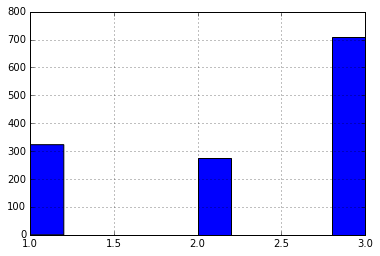

In [136]:
data.pclass.hist()
data.corr()

In [137]:
group = data.groupby(['sex', 'survived']).count()
group[['name']]


name
sex    survived      
female 0          127
       1          339
male   0          682
       1          161

From this table, we can compute some basic statistics which gives :

In [138]:
group.apply(lambda x: 100*x/float(x.sum()))[['name']]

name
sex    survived           
female 0          9.702063
       1         25.897632
male   0         52.100840
       1         12.299465

In [169]:
group2 = data.pivot(columns='sex', values = 'survived')
group2

sex,female,male
0,1.0,NaN
1,NaN,1.0
2,0.0,NaN
3,NaN,0.0
4,0.0,NaN
5,NaN,1.0
6,1.0,NaN
7,NaN,0.0
8,1.0,NaN
9,NaN,0.0


In [93]:
data.body.isnull().sum()

1188